In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [276]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\CarDataSet.csv")

In [277]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [278]:
df.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)


In [279]:


# Use linear interpolation to impute missing values in 'Price'
df['Price'] = df['Price'].interpolate(method='linear', limit_direction='both')

In [280]:
# Remove non-numeric characters from New_Price column
df['New_Price'] = df['New_Price'].str.replace('[^0-9\.]', '')

# Convert New_Price column to float type
df['New_Price'] = df['New_Price'].astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3156\2459119913.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['New_Price'] = df['New_Price'].str.replace('[^0-9\.]', '')


In [281]:
# Fill missing values in 'New_Price' with the mean of the column
new_price_mean = df['New_Price'].mean()
df['New_Price'].fillna(new_price_mean, inplace=True)

In [282]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [283]:
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Power'] = df['Power'].str.replace('bhp', '')


<Axes: xlabel='Owner_Type', ylabel='count'>

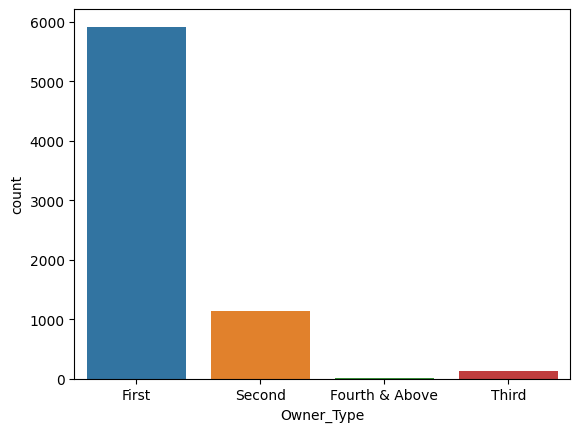

In [284]:
sns.countplot(x='Owner_Type',data=df)

<Axes: xlabel='Transmission', ylabel='count'>

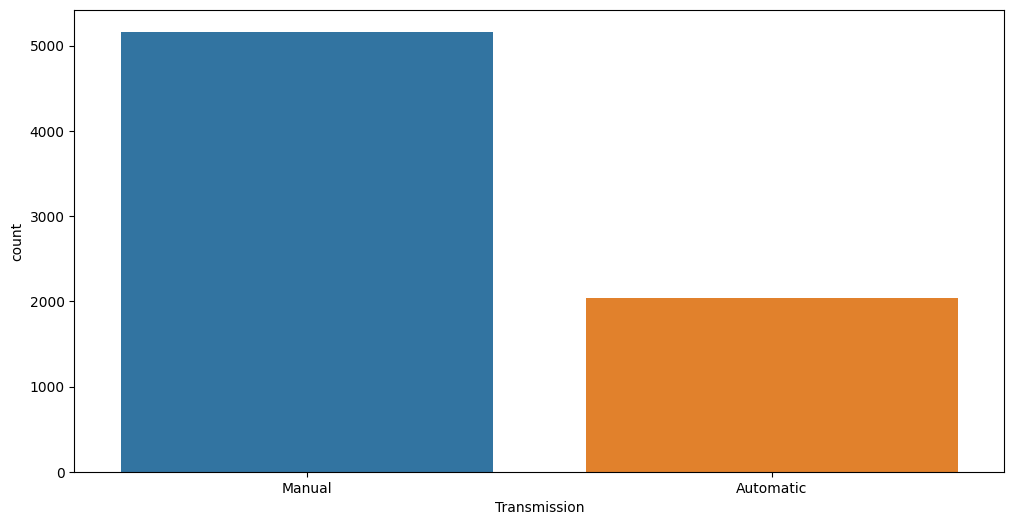

In [285]:
plt.figure(figsize = (12 ,6))
sns.countplot(data = df, x = 'Transmission')

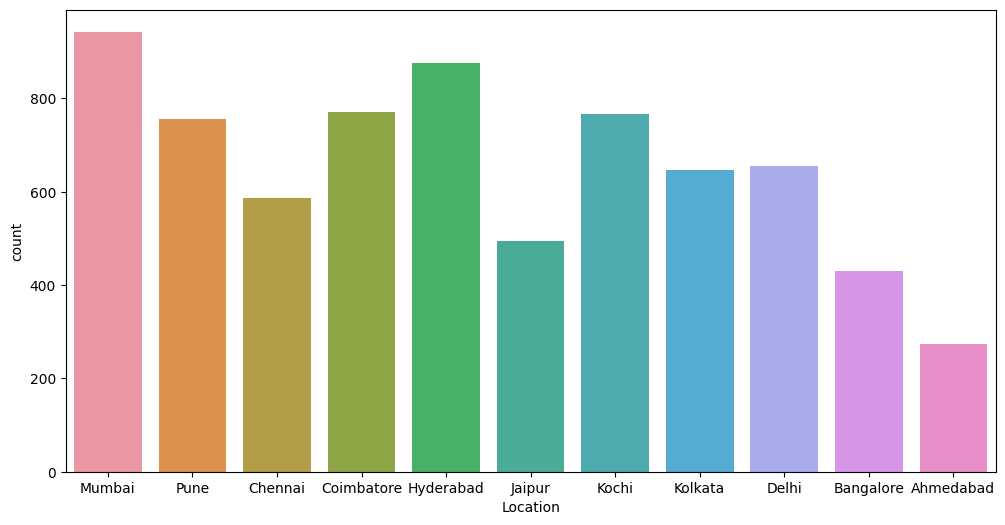

In [286]:
plt.figure(figsize = (12 ,6))
sns.countplot(data = df, x = 'Location')
plt.show()

<Axes: xlabel='Fuel_Type', ylabel='count'>

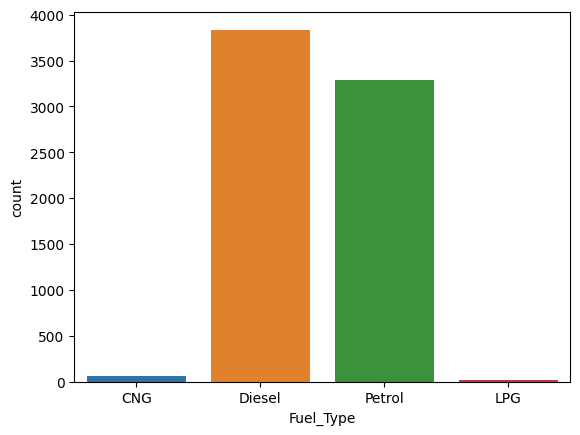

In [287]:
sns.countplot(x='Fuel_Type',data=df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3156\2424759649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


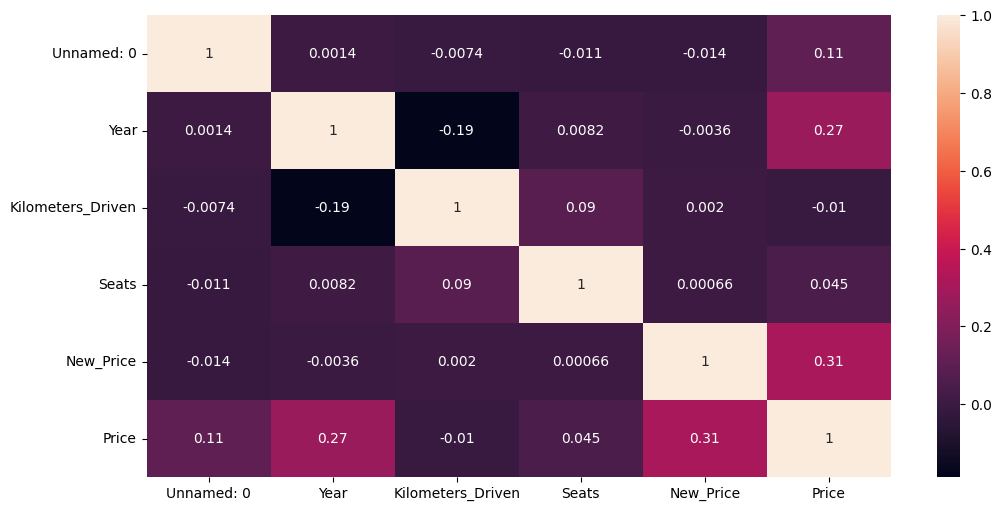

In [288]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

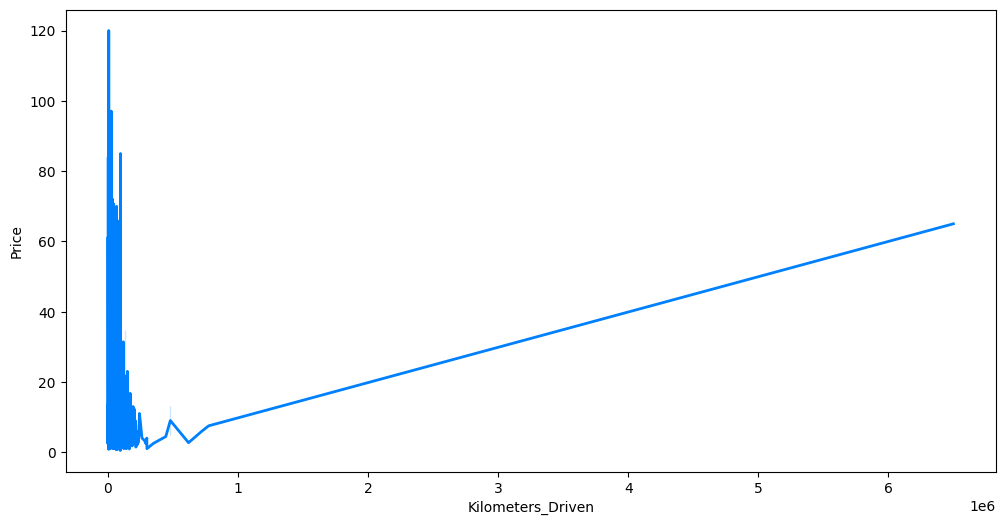

In [289]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Kilometers_Driven', y = 'Price', linewidth = 2, color = '#0080fc')
plt.show()

In [290]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,19.900607,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,19.900607,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.610000,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,19.900607,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,19.900607,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,19.900607,2.50
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,19.900607,2.50
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,19.900607,2.50
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,19.900607,2.50


In [291]:
X = df[['Kilometers_Driven','Mileage']].values 
y = df['Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [292]:
reg=LinearRegression()

In [293]:
reg.fit(X_train,y_train)

LinearRegression()

In [294]:
reg.coef_

array([[-2.10988096e-06, -6.63221943e-01]])

In [295]:
Y_pred=reg.predict(X_test)

In [296]:
mae=mean_absolute_error(y_test,Y_pred)
mse=mean_squared_error(y_test,Y_pred)
r2=np.sqrt(mse)

In [297]:
mae

5.8576587513855305

In [298]:
r2

9.548820156248821